<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/lecture_04/binary_classification_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression example - real estate price prediction (the Boston Housing dataset)


Based on: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset


In [1]:
# Load the IMDB dataset
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()



Observe the data:

In [2]:
import numpy as np

# 404 training samples 
print(train_data.shape, train_labels.shape)
num_features = train_data.shape[1]

# 102 testing samples
print(test_data.shape, test_labels.shape)

# 1 output: price in 1000$
print(train_labels[:10])

# Check for missing values
print("Number of missing values in train data:", np.sum(np.isnan(train_data)))
print("Number of missing values in test data", np.sum(np.isnan(test_data)))

(404, 13) (404,)
(102, 13) (102,)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
Number of missing values in train data: 0
Number of missing values in test data 0


Explore the features:

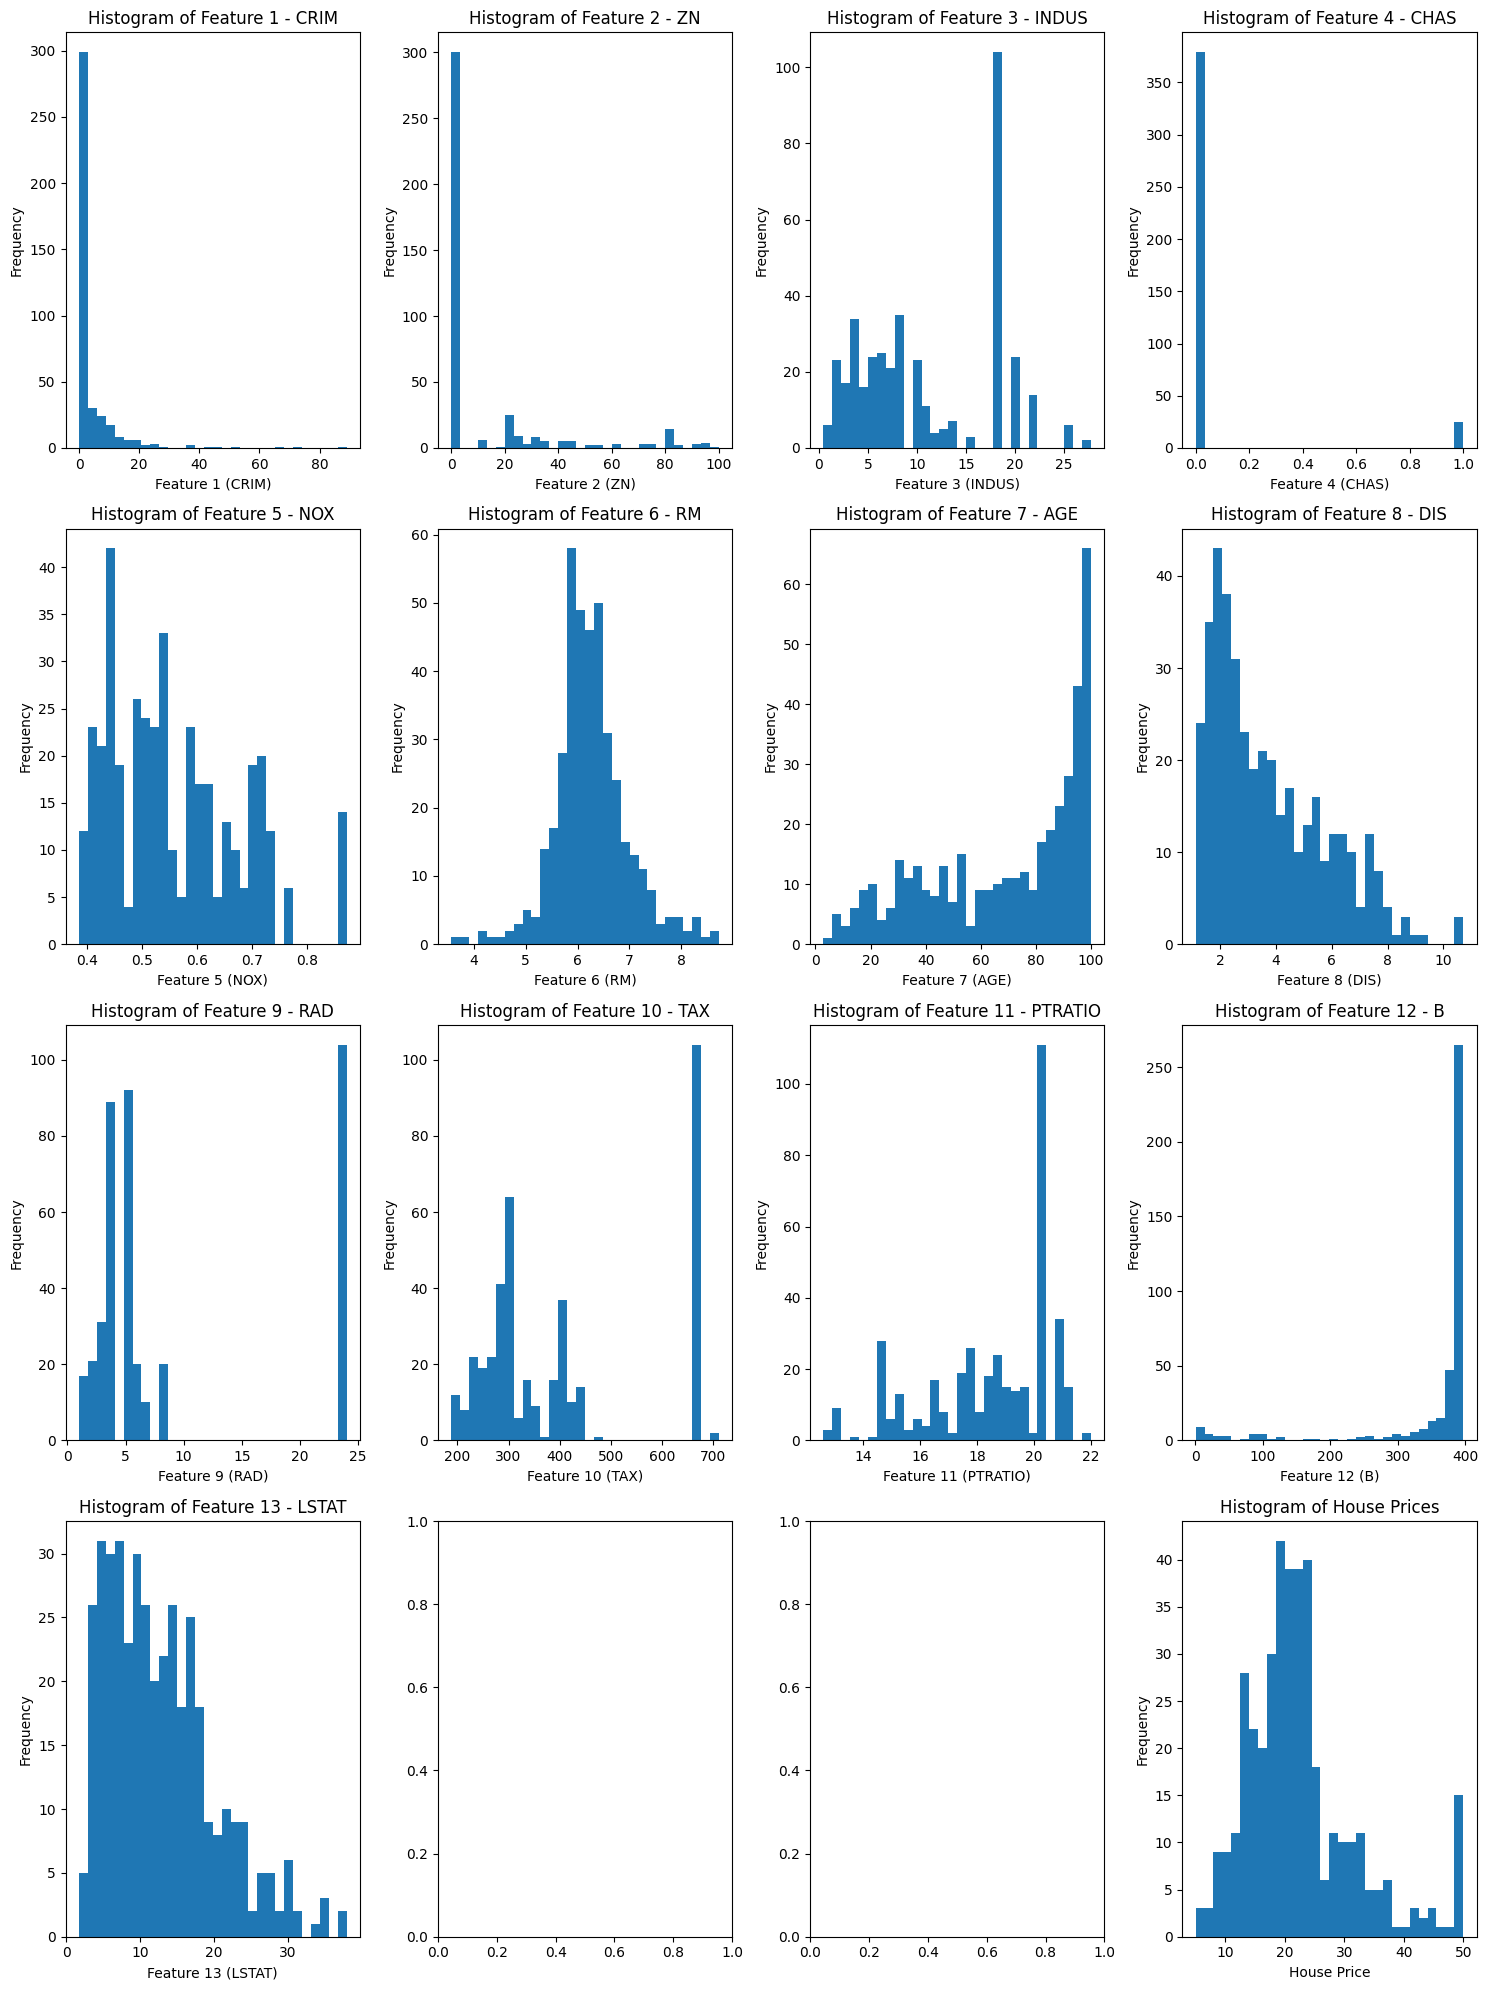

In [3]:
# Histograms of features and price
import matplotlib.pyplot as plt

feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create subplots for histograms
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each feature
for i in range(num_features):
    axes[i].hist(train_data[:, i], bins=30)
    axes[i].set_xlabel(f"Feature {i+1} ({feature_names[i]})")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of Feature {i+1} - {feature_names[i]}")

# Plot histogram for house prices
axes[-1].hist(train_labels, bins=30)
axes[-1].set_xlabel("House Price")
axes[-1].set_ylabel("Frequency")
axes[-1].set_title("Histogram of House Prices")


plt.tight_layout()
plt.show()

**Observation:** each feature has different range of values

# Preprocess the data

In [4]:
# 1. Normalize the input and the output data
# standard scaling to center the data around zero and achieve a unit standard deviation

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(train_data)

# Transform the test data using the same scaler
x_test = scaler.transform(test_data)

# Mean and standard deviation after normalization:
print(np.mean(x_train), np.std(x_train), np.mean(x_test), np.std(x_test))

scaler1 = StandardScaler()

# Reshape the labels
y_train_2d = train_labels.reshape(-1, 1)  
y_test_2d = test_labels.reshape(-1, 1)

# Fit the scaler on the training labels and transform it
y_train = scaler1.fit_transform(y_train_2d)

# Transform the test labels using the same scaler
y_test = scaler1.transform(y_test_2d)

# 2. Split the training data into training and validation sets
# The validation set is used to monitor the performance of the model during training and prevent overfitting.

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)



2.6016254395785847e-15 0.9999999999999993 0.020826991430640224 0.9836083446422431


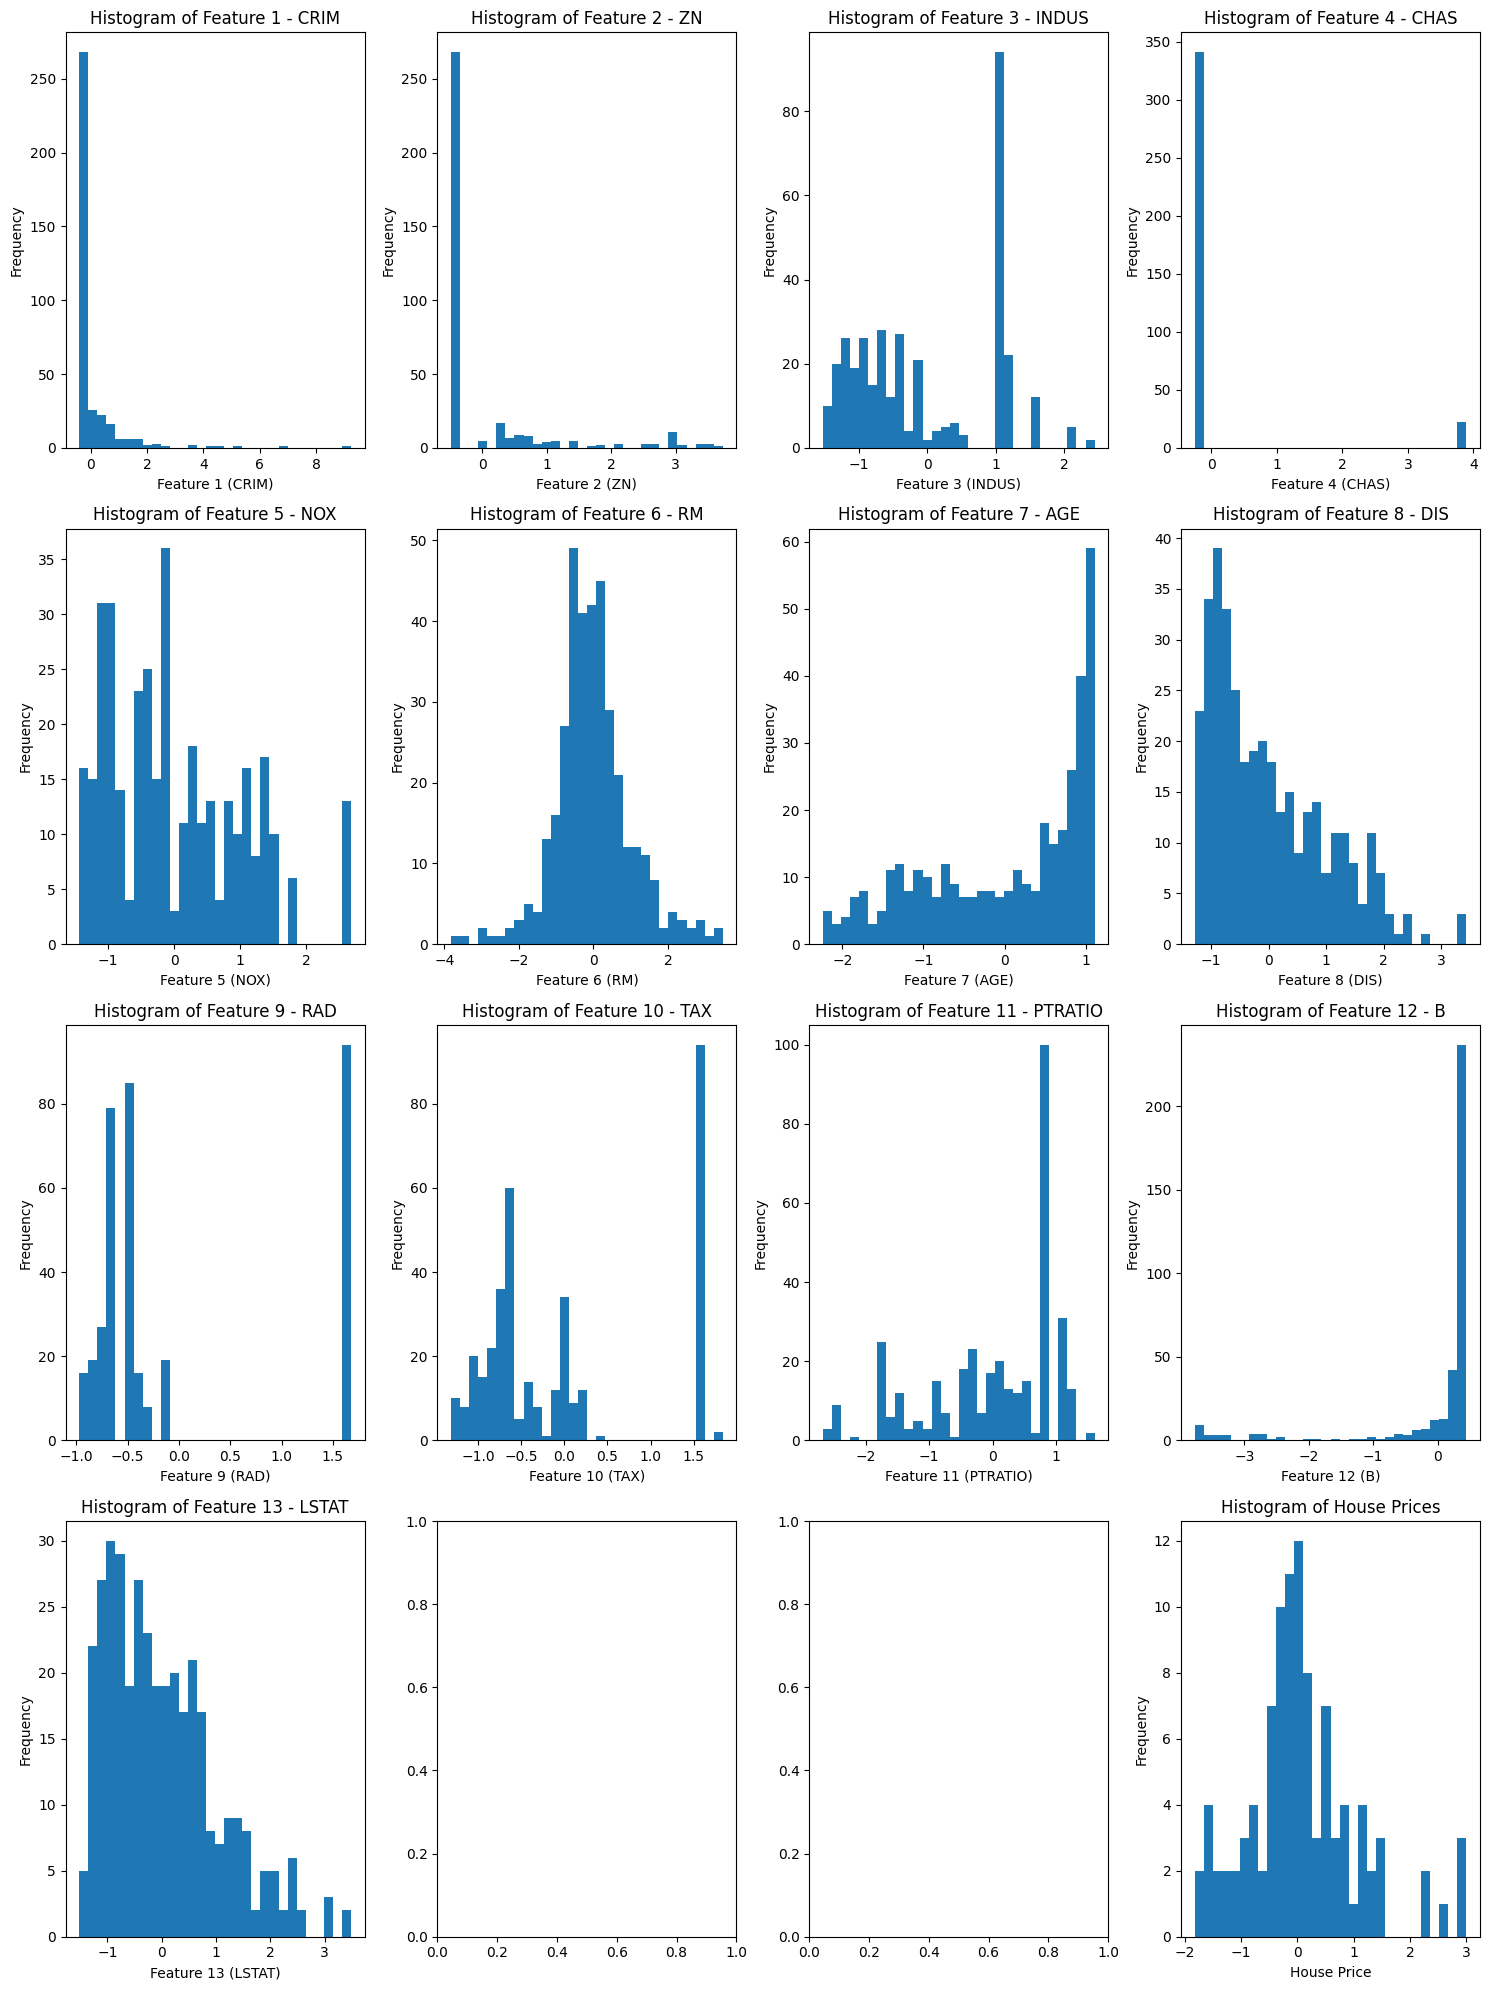

In [5]:
# Histograms of features after normalization
import matplotlib.pyplot as plt
num_features = x_train.shape[1]


feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create subplots for histograms
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each feature
for i in range(num_features):
    axes[i].hist(x_train[:, i], bins=30)
    axes[i].set_xlabel(f"Feature {i+1} ({feature_names[i]})")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of Feature {i+1} - {feature_names[i]}")

# Plot histogram for house prices
axes[-1].hist(y_test, bins=30)
axes[-1].set_xlabel("House Price")
axes[-1].set_ylabel("Frequency")
axes[-1].set_title("Histogram of House Prices")


plt.tight_layout()
plt.show()

# K-fold crossvalidation
- the training set is small -> use **k-fold crossvalidation** to find the best parameters of the model 

### MLP model for regression:
- 'linear' activation function in the output layer 
- 'relu' or 'tanh' in the hidden layers
- MSE loss function + MAE or MSE metrics (https://keras.io/api/metrics/regression_metrics/)

In [6]:
# Data frame for results
import pandas as pd

columns = ["Model Details", "Validation MAE"]
results_df1 = pd.DataFrame(columns=columns)

Processing fold #0
Processing fold #1
Processing fold #2
Errors: [0.2283954620361328, 0.2651796340942383, 0.31785595417022705]
Mean error: 0.27047701676686603
Results:
  Model Details  Validation MAE
0       64-64-1        0.270477


C:\Users\zuzka\AppData\Local\Temp\ipykernel_80536\2974014000.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df1 = pd.concat([results_df1, pd.DataFrame([new_entry])], ignore_index=True)


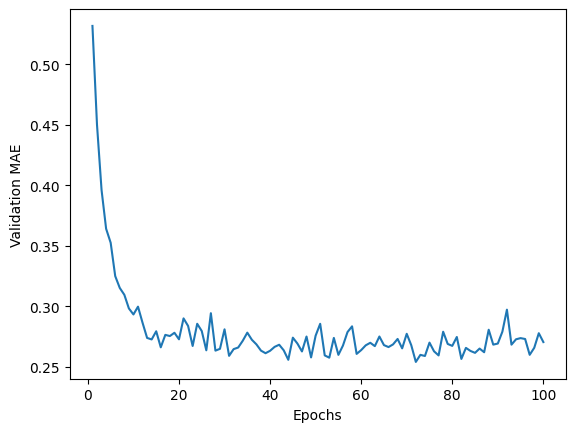

In [7]:
import keras

def build_model():
    model = keras.Sequential([
    keras.layers.InputLayer(shape=(num_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # output layer
    ])
    model.compile(optimizer= keras.optimizers.RMSprop(learning_rate=0.001),
              loss= keras.losses.MeanSquaredError(),
              metrics= [keras.metrics.MeanAbsoluteError()])
    return model


# K-fold validation:

k = 3 # 10
num_val_samples = len(x_train) // k
num_epochs = 100
batch_size = 64
all_scores = []
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    x_val = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_x_train = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val),
              epochs=num_epochs, batch_size=batch_size, verbose=0, )
    # print(history.history.keys())
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)
    val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
    all_scores.append(val_mae)

print("Errors:", all_scores)

print("Mean error:", np.mean(all_scores))

# Building the history of successive mean K-fold validation scores
min_epochs = min([len(x) for x in all_mae_histories])
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(min_epochs)]


model_details = "64-64-1"
# Add results to the dataframe: 
new_entry = {
    "Model Details" : model_details,
    "Validation MAE" : average_mae_history[-1],  
}
results_df1 = pd.concat([results_df1, pd.DataFrame([new_entry])], ignore_index=True)

# View and and save the dataframe:
print("Results:")
print(results_df1)

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()



# Define and train the final model

In [8]:
# Data frame for results
import pandas as pd

columns = ["Model Name", "Details", "Test MAE", "Test MSE"]
results_df = pd.DataFrame(columns=columns)

In [9]:
###############################################
# Define the log directory for Tensorboard
import os
import datetime
import keras

model_datetime_name = "boston_mlp_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "./logs/fit_boston/" + model_datetime_name
# print(os.getcwd())

# Clear any logs from previous runs
# !rm -rf ./logs/

# Ensure the directory exists
if not os.path.exists(os.path.dirname(log_dir)):
    os.makedirs(os.path.dirname(log_dir))

###############################################
# Initialize Tensorboard callback
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Visualize histograms of layer weights
    write_graph=True,  # Log the graph to visualize the model structure
    write_images=True  # Optionally, save images of weights and activation histograms
    # update_freq='batch'  # Log metrics after every batch
    # write_steps_per_second=True  # Log steps per second during training
)
################################################

# define the model architecture
model = keras.Sequential([
    keras.layers.InputLayer(shape=(num_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # output layer
])

model.summary()

# Set model parameters
model.compile(optimizer= keras.optimizers.RMSprop(learning_rate=0.001),
              loss= keras.losses.MeanSquaredError(),
              metrics= [keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])


num_epochs = 300
batch_size = 32

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_error, test_mse, test_mae = model.evaluate(x_test, y_test)
print('Test error:', test_error, test_mse,  '\nTest MAE:', test_mae)


# Save the model
model_dir = "./models/"

# Ensure the directory exists
if not os.path.exists(os.path.dirname(model_dir)):
    os.makedirs(os.path.dirname(model_dir))
# Create a unique model name using the current date and time
model_name = model_dir + model_datetime_name + ".keras"
# Save the model with the generated name
model.save(model_name)

model_details="64-64"
# Add results to the dataframe: 
new_entry = {
    "Model Name" : model_datetime_name,
    "Details" : model_details,
    "Test MAE" : test_mae, 
    "Test MSE" : test_mse, 
}
results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)
results_df.to_csv(model_dir + "boston_results.csv", index=False)

# View and and save the dataframe:
print("Results:")
print(results_df)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.8149 - mean_absolute_error: 0.5968 - mean_squared_error: 0.8149 - val_loss: 0.4971 - val_mean_absolute_error: 0.4431 - val_mean_squared_error: 0.4971
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3837 - mean_absolute_error: 0.3863 - mean_squared_error: 0.3837 - val_loss: 0.3335 - val_mean_absolute_error: 0.3557 - val_mean_squared_error: 0.3335
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.3078 - mean_squared_error: 0.2296 - val_loss: 0.3052 - val_mean_absolute_error: 0.3726 - val_mean_squared_error: 0.3052
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2118 - mean_absolute_error: 0.3060 - mean_squared_error: 0.2118 - val_loss: 0.2203 - val_mean_absolute_error: 0.2910 - val_mean_squared_error: 0.2203
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2143 - mean_absolute_error: 0.2928 - mean_squared_error: 0.2143 - val_loss: 0.2020 - val_m

C:\Users\zuzka\AppData\Local\Temp\ipykernel_80536\711144958.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)


dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


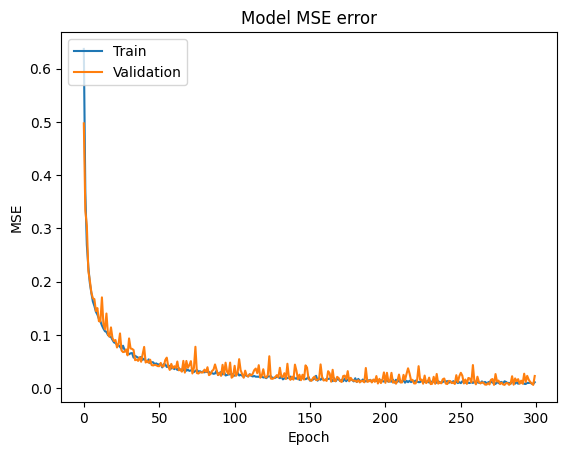

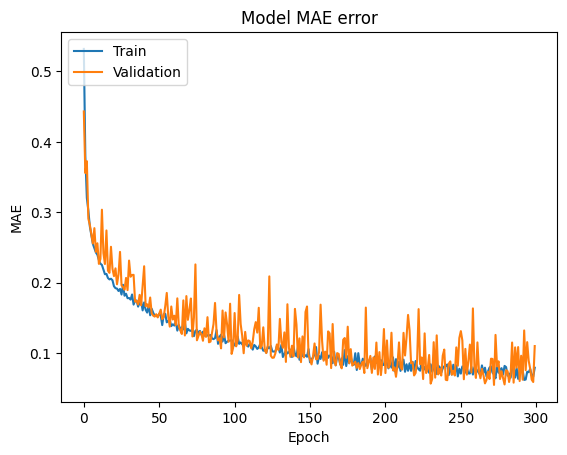

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.1018 - mean_squared_error: 0.0201 
Training MAE: 0.10423047840595245 
Train loss (MSE): 0.02075936645269394
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.1036 - mean_squared_error: 0.0207
Validation MAE: 0.11013844609260559 
Test loss (MSE): 0.023205308243632317
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1836 - mean_absolute_error: 0.2998 - mean_squared_error: 0.1836
Test MAE: 0.3026246726512909 
Test loss (MSE): 0.19754599034786224


In [10]:
# plot the training progress:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


# Plot training & validation loss values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the training set
train_loss, _ ,  train_mae = model.evaluate(x_train, y_train)
print('Training MAE:', train_mae, '\nTrain loss (MSE):', train_loss)

# Evaluate the model on the validation set
val_loss, _, val_mae = model.evaluate(x_val, y_val)
print('Validation MAE:', val_mae, '\nTest loss (MSE):', val_loss)

# Evaluate the model on the test set
test_loss, _, test_mae = model.evaluate(x_test, y_test)
print('Test MAE:', test_mae, '\nTest loss (MSE):', test_loss)

## Evaluate the model and make predictions on new data

In [11]:

# Get predicted values
y_pred = model.predict(x_test)

# Convert predicted values:
predicted_labels = scaler1.inverse_transform(y_pred)

# To 1D array
predicted_labels =  np.squeeze(predicted_labels, axis=1)

# Observe some predictions
print(list(zip (np.squeeze(y_test, axis=1)[:5], np.squeeze(y_pred, axis=1)[:5])))
print(list(zip (test_labels[:5], predicted_labels[:5])))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[(-1.6518090001432328, -1.4997138), (-0.39080722483352276, -0.43271306), (-0.3690658149143899, -0.27629384), (0.5005905818509273, 2.045292), (-0.02120325620826308, 0.1402555)]
[(7.2, 8.599129), (18.8, 18.414507), (19.0, 19.853413), (27.0, 41.209763), (22.2, 23.685265)]


## Summary
1. For regression, the MSE loss function and specific metrics (MSE, MAE, etc.) are used. A linear activation function is chosen for the output layer.
2. If the input features have different value ranges, it's good practice to normalize each one based on the standard deviation.
3. The smaller the training set, the smaller the model we should train to avoid overfitting.
4. If the model is trained for too long, it starts overfitting (the error on the validation set increases).
5. If we have a small amount of data, it's better to use k-fold cross-validation to evaluate the model performance.

# Exercises
1. **Use k-fold cross-validation** to find the optimal number of neurons in the hidden layers.
2. **Implement early stopping** to avoid overtraining. Compare the results (observe the error on the validation or testing sets and the training curves).
3. **Add L2 regularization, L1 regularization, and dropout layers** to prevent overfitting. Compare the results (observe the error on the validation or testing sets and the training curves).
4. **Apply data augmentation** to reduce overfitting. Compare the results (observe the error on the validation or testing sets and the training curves).

In [12]:
# Early stopping:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [13]:
# Regularization:
regularization_param = 0.0001
model1 = keras.Sequential([
    keras.layers.InputLayer(shape=(num_features,)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(regularization_param), 
                       bias_regularizer=keras.regularizers.l2(regularization_param)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(regularization_param),),
    keras.layers.Dense(1, activation='linear')  # output layer
    ])


In [14]:
# Dropout layers:
model1 = keras.Sequential([
    keras.layers.InputLayer(shape=(num_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),  # Add after each dense layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='linear')  # output layer
    ])


In [15]:
# Data augmentation (by adding noise):
def augment_data(X, y, num_copies):
  """
  Performs data augmentation on input and output data.

  Args:
    X: Input data (2D numpy array).
    y: Output data (2D numpy array).
    num_copies: The number of augmented copies to create for each data point.

  Returns:
    Tuple: Augmented input (X_aug) and output (y_aug) data.
  """

  X_aug = []
  y_aug = []

  for i in range(len(X)):
    X_aug.append(X[i])
    y_aug.append(y[i])
    for _ in range(num_copies):
      noise = np.random.normal(0, 0.1, X[i].shape)  # Adjust noise level as needed
      X_aug.append(X[i] + noise)
      y_aug.append(y[i]) # Output remains the same


  return np.array(X_aug), np.array(y_aug)

x_train_augmented, y_train_augmented = augment_data(x_train, y_train, 3)

print(x_train.shape, x_train_augmented.shape)

(363, 13) (1452, 13)


In [16]:
###############################################
# Load TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard before training begins
%tensorboard --logdir logs/fit_boston --reload_interval=1

Reusing TensorBoard on port 6006 (pid 71312), started 0:07:04 ago. (Use '!kill 71312' to kill it.)